In [27]:
import torch
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

from burgers_pinn import PINN

In [14]:
device = torch.device("cuda:1")

In [38]:
x = torch.linspace(0, 1, 128)
t = torch.linspace(0, 1, 100)

x_, t_ = torch.meshgrid(x, t, indexing='ij')
x_ = x_.reshape(-1, 1)
t_ = t_.reshape(-1, 1)
xt = torch.cat([x_, t_], dim=1)

In [52]:
pinn = PINN()
pinn.net.load_state_dict(torch.load('./burgers_pinn_Nt100_v1e-02_N200_no1.pt'))
with torch.no_grad():
    u_pred1 = pinn.net(xt.to(device))
    u_pred1 = u_pred1.cpu().numpy().reshape(128, 100)

In [53]:
pinn.net.load_state_dict(torch.load('./burgers_pinn_Nt100_v1e-02_N200_no2.pt'))
with torch.no_grad():
    u_pred2 = pinn.net(xt.to(device))
    u_pred2 = u_pred2.cpu().numpy().reshape(128, 100)

In [54]:
pinn.net.load_state_dict(torch.load('./burgers_pinn_Nt100_v1e-02_N200_no3.pt'))
with torch.no_grad():
    u_pred3 = pinn.net(xt.to(device))
    u_pred3 = u_pred3.cpu().numpy().reshape(128, 100)

In [55]:
pinn.net.load_state_dict(torch.load('./burgers_pinn_Nt100_v1e-02_N200_no4.pt'))
with torch.no_grad():
    u_pred4 = pinn.net(xt.to(device))
    u_pred4 = u_pred4.cpu().numpy().reshape(128, 100)

In [56]:
data = sio.loadmat('../../data/burgers_data_Nt100_v1e-02_N200_no1.mat')
u1 = data['u']
data = sio.loadmat('../../data/burgers_data_Nt100_v1e-02_N200_no2.mat')
u2 = data['u']
data = sio.loadmat('../../data/burgers_data_Nt100_v1e-02_N200_no3.mat')
u3 = data['u']
data = sio.loadmat('../../data/burgers_data_Nt100_v1e-02_N200_no4.mat')
u4 = data['u']

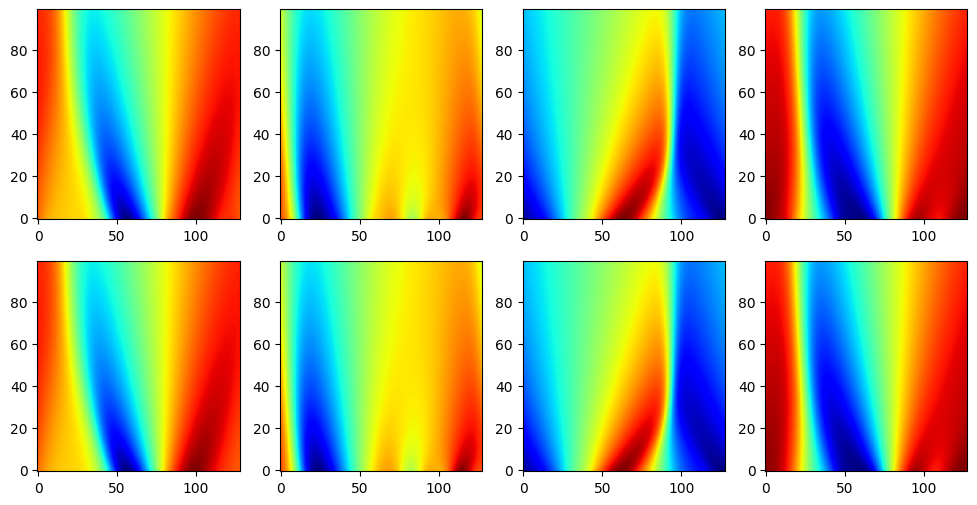

In [57]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax[0, 0].imshow(u1, cmap='jet', aspect='auto', origin='lower')
ax[0, 1].imshow(u2, cmap='jet', aspect='auto', origin='lower')
ax[0, 2].imshow(u3, cmap='jet', aspect='auto', origin='lower')
ax[0, 3].imshow(u4, cmap='jet', aspect='auto', origin='lower')
ax[1, 0].imshow(u_pred1.T, cmap='jet', aspect='auto', origin='lower')
ax[1, 1].imshow(u_pred2.T, cmap='jet', aspect='auto', origin='lower')
ax[1, 2].imshow(u_pred3.T, cmap='jet', aspect='auto', origin='lower')
ax[1, 3].imshow(u_pred4.T, cmap='jet', aspect='auto', origin='lower')

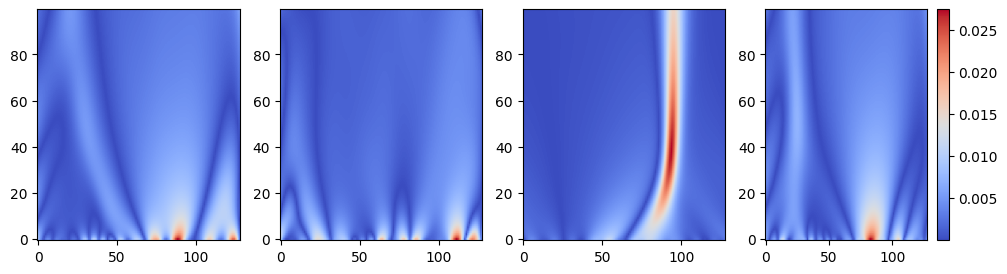

In [58]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
im = ax[0].imshow(np.abs(u1 - u_pred1.T), cmap='coolwarm', aspect='auto', origin='lower')
ax[1].imshow(np.abs(u2 - u_pred2.T), cmap='coolwarm', aspect='auto', origin='lower')
ax[2].imshow(np.abs(u3 - u_pred3.T), cmap='coolwarm', aspect='auto', origin='lower')
ax[3].imshow(np.abs(u4 - u_pred4.T), cmap='coolwarm', aspect='auto', origin='lower')
fig.colorbar(im, ax=ax[3])